In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
path = "C:/Users/Paulitsch.ALLMED/Desktop/Interne Fortbildung/"

In [3]:
filename = 'heart.csv'
heart = pd.read_csv(os.path.join(path,filename), sep = ',')

In [4]:
print(heart.shape)
heart

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [52]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
heart['sex'] = heart['sex'].astype('category')
heart['fbs'] = heart['fbs'].astype('category')
heart['exng'] = heart['exng'].astype('category')
heart['output'] = heart['output'].astype('category')
heart['cp'] = heart['cp'].astype('category')

In [7]:
heart.dtypes

age            int64
sex         category
cp          category
trtbps         int64
chol           int64
fbs         category
restecg        int64
thalachh       int64
exng        category
oldpeak      float64
slp            int64
caa            int64
thall          int64
output      category
dtype: object

In [8]:
cats_to_order = [0, 1, 2, 3]
heart['cp'] = heart['cp'].cat.reorder_categories(cats_to_order, ordered=True)

In [9]:
heart['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [10]:
heart['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [11]:
X = heart.loc[:, heart.columns != 'output']
y = heart.output

In [12]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: category
Categories (2, int64): [0, 1]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 1)

## 1. Logistische Regression

In [55]:
#https://www.datacamp.com/tutorial/understanding-logistic-regression-python
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\Paulitsch.ALLMED\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[71, 32],
       [15, 95]], dtype=int64)

In [58]:
pred=logreg.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75       103
           1       0.75      0.86      0.80       110

    accuracy                           0.78       213
   macro avg       0.79      0.78      0.78       213
weighted avg       0.79      0.78      0.78       213



In [59]:
importance = logreg.coef_
importance=np.sort(importance)
importance

array([[-1.32376427, -1.27586178, -0.92186663, -0.76099933, -0.36848612,
        -0.05464882, -0.01010056,  0.03813139,  0.03874458,  0.06568425,
         0.1312646 ,  0.63636373,  1.27764367]])

In [60]:
for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))

Feature : 0 has score  : [-1.32376427 -1.27586178 -0.92186663 -0.76099933 -0.36848612 -0.05464882
 -0.01010056  0.03813139  0.03874458  0.06568425  0.1312646   0.63636373
  1.27764367] 


In [73]:
importance2 = logreg.coef_[0]

importance2_desc= importance2.sort_values('Feature',ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

Feature: 0, Score: 0.03874
Feature: 1, Score: -1.32376
Feature: 2, Score: 1.27764
Feature: 3, Score: -0.05465
Feature: 4, Score: -0.01010
Feature: 5, Score: 0.03813
Feature: 6, Score: 0.63636
Feature: 7, Score: 0.06568
Feature: 8, Score: -1.27586
Feature: 9, Score: -0.92187
Feature: 10, Score: 0.13126
Feature: 11, Score: -0.76100
Feature: 12, Score: -0.36849


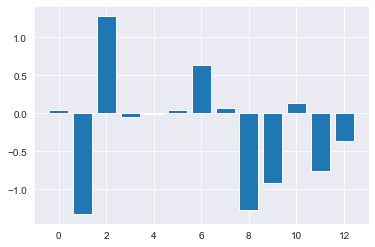

In [67]:
from matplotlib import pyplot


for i,v in enumerate(importance2):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance2))], importance2)
pyplot.show()

## Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
baseline = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3, min_samples_split = 2, min_samples_leaf = 1, subsample = 1, max_features = 'sqrt', random_state = 10)
baseline.fit(X_train, y_train)
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       103
           1       0.77      0.88      0.82       110

    accuracy                           0.80       213
   macro avg       0.81      0.80      0.80       213
weighted avg       0.81      0.80      0.80       213



Accuracy of the GBM on test set: 0.803


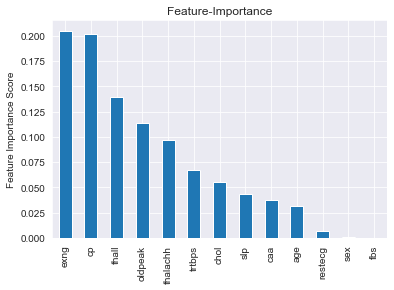

In [53]:
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending = False)
feat_imp.plot(kind = 'bar', title = 'Feature-Importance')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))

## Neuronales Netz

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

In [27]:
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [28]:
pred=clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       103
           1       0.81      0.91      0.85       110

    accuracy                           0.84       213
   macro avg       0.85      0.84      0.84       213
weighted avg       0.85      0.84      0.84       213



In [42]:
data = [["Neuronales Netz", 0.84], ["Gradient Boosting", 0.80], ["Regression", 0.78]]
accuracies = pd.DataFrame(data, columns=['Modell', 'Accuracy'])
accuracies

,Modell,Accuracy
0,Neuronales Netz,0.84
1,Gradient Boosting,0.80
2,Regression,0.78


In [47]:
accuracies.dtypes

Modell       object
Accuracy    float64
dtype: object

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U17'), dtype('float64')) -> None

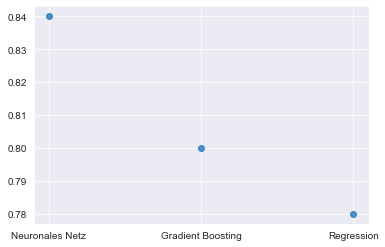

In [50]:
gfg = sns.regplot(x = accuracies["Modell"], y = accuracies["Accuracy"])
gfg.set(xlabel ="GFG X", ylabel = "GFG Y", title ='some title')
gfg.show()